# 房产行情评估

---
Topic:
    - 商业金融
,    - 房地产
,    - 日常生活

Field:
    - 数据挖掘
,    - 预测
,    - 聚类

License:
    - CC-BY 4.0 转载需署名

Ext:
    - .csv

DatasetUsage:
    - 29981
---

## **背景描述**
在当今房地产市场中，准确评估住宅物业的价值对于买家、卖家以及房地产投资者而言至关重要。
本数据集包含了诸多影响住宅价格的核心因素，帮助清晰解析房产价值。它记录了房屋的基本规格，譬如总面积、卧室与浴室数量、楼层情况，同时也涵盖了对现代生活便利性至关重要的细节——是否紧邻主干道、是否设有客人房、有无地下室、是否配备热水供暖及空调系统，乃至停车便利性等。此外，该数据集还特别标注了房产所处地段的受欢迎程度与装修状态，这些都是在评估房产价值时不可忽视的重要方面。

![Image Name](https://cdn.kesci.com/upload/image/sd94tgmess.png?imageView2/0/w/640/h/640)

## **数据说明**
| 字段               | 说明                                       |
|-------------------|------------------------------------------|
| price             | 房产的价格。                              |
| area              | 房产的总面积，以平方英尺为单位。            |
| bedrooms          | 房产中的卧室数量。                        |
| bathrooms         | 房产中的浴室数量。                        |
| stories           | 房产的楼层数。                            |
| mainroad          | 房产是否位于主要道路旁（是/否）。  |
| guestroom         | 房产是否有客房（是/否）。          |
| basement          | 房产是否有地下室（是/否）。        |
| hotwaterheating   | 房产是否有热水供暖系统（是/否）。  |
| airconditioning   | 房产是否有空调（是/否）。          |
| parking           | 房产提供的停车位数量。                    |
| prefarea          | 房产是否位于首选区域（是/否）。    |
| furnishingstatus | 房产的装修状态（精装修、半装修、毛坯）。 |

## **数据来源**
https://www.kaggle.com/datasets/saurabhbadole/housing-price-data


## **问题描述**
房价影响因素分析
构建房价预测模型
最优投资策略识别
房价差异特征探究

## 读取数据

导入数据分析相应的库，读取数据集

In [546]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [547]:
original_data = pd.read_csv('Housing_Price_Data.csv')
original_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 评估和清理数据

这个部分我们将对`original_data`进行评估和清理，并把最后的结果保存在新变量`cleaned_data`中

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

In [548]:
cleaned_data = original_data.copy()

### 数据整齐度

In [549]:
cleaned_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 数据干净度

In [550]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


从表格结果来看，该数据集共有545条观察值，没有缺失的数据。

数据类型方面，我们知道`mainroad`,`guestroom`,`basement`, `hotwaterheating`, `airconditioning`, `prefarea`, `furnishingstatus`都是分类数据，可以把数据类型转换为Category

In [551]:
cleaned_data['mainroad'] = cleaned_data['mainroad'].astype('category')
cleaned_data['guestroom'] = cleaned_data['guestroom'].astype('category')
cleaned_data['basement'] = cleaned_data['basement'].astype('category')
cleaned_data['hotwaterheating'] = cleaned_data['hotwaterheating'].astype('category')
cleaned_data['airconditioning'] = cleaned_data['airconditioning'].astype('category')
cleaned_data['prefarea'] = cleaned_data['prefarea'].astype('category')
cleaned_data['furnishingstatus'] = cleaned_data['furnishingstatus'].astype('category')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


### 处理缺失值

`cleaned_data`不存在缺失值，所以不需要对缺失数据进行处理

### 处理重复数据

由于数据集的没有唯一标识符的列，所以只需看有没有全部列一样的观察值

In [552]:
cleaned_data.duplicated().sum()

0

可知该数据集不存在重复数据

### 处理不一致数据

所有分类数据都有可能存在不一致数据，都需要查看

In [553]:
cleaned_data['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [554]:
cleaned_data['guestroom'].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [555]:
cleaned_data['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [556]:
cleaned_data['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [557]:
cleaned_data['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [558]:
cleaned_data['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [559]:
cleaned_data['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

上述可知，不存在不一致数据

### 无效或错误数据

In [560]:
cleaned_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


由上述统计信息来看，`cleaned_data`中没有脱离实际的值

### 保存数据

In [561]:
cleaned_data.to_csv('cleaned_data.csv',index=False)

## 探索数据

在着手推断统计学分析之前，我们可以先借助数据可视化，探索数值变量的分布，以及与房价存在相关性的变量，为后续的进一步分析提供方向。

### 房价分布

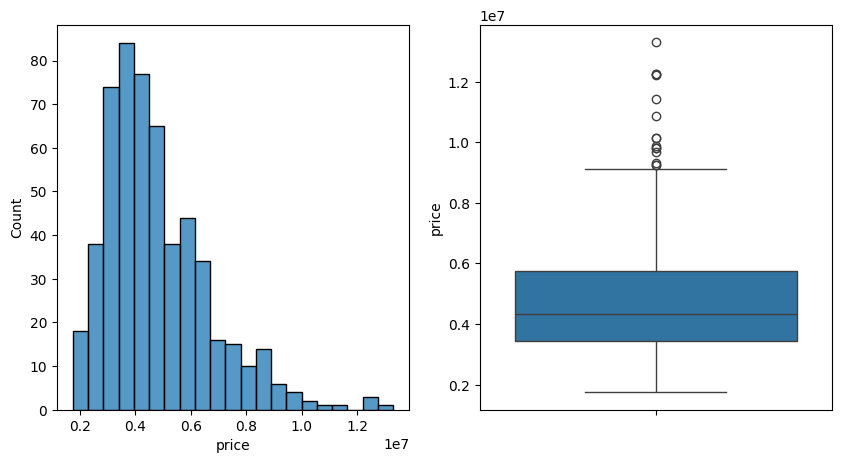

In [562]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.histplot(cleaned_data['price'],ax=axes[0])
sns.boxplot(cleaned_data['price'], ax=axes[1])
plt.show()

可知房价呈右偏态分布，说明房价集中分布在4,000,000左右，但有少量房价很大的极端值，使得均值被拉高

### 面积与房价

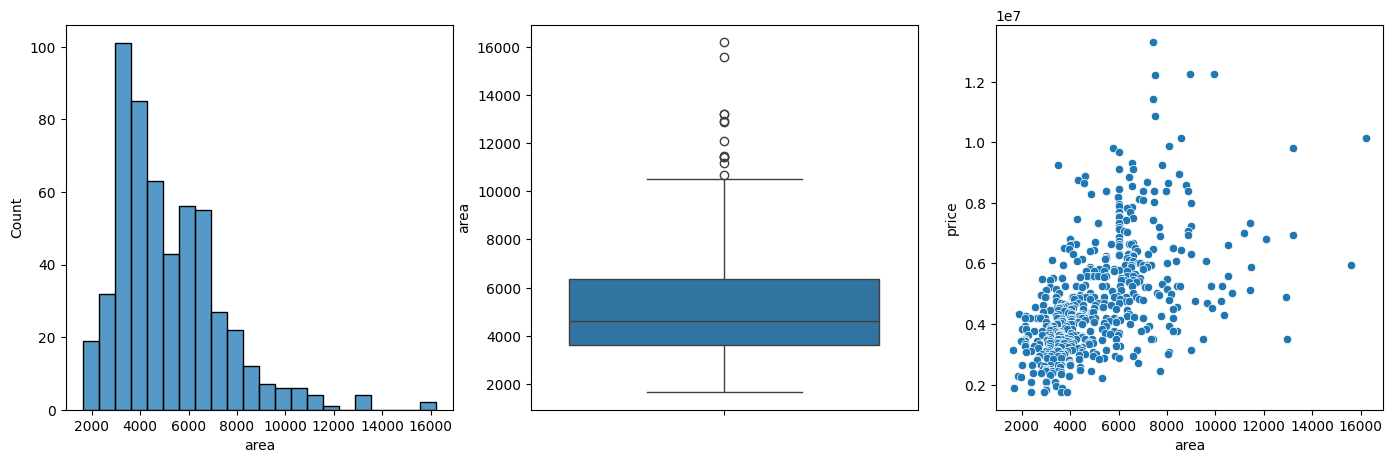

In [563]:
fig, axes = plt.subplots(1,3,figsize = (17,5))
sns.histplot(cleaned_data['area'],ax=axes[0])
sns.boxplot(cleaned_data['area'],ax=axes[1])
sns.scatterplot(x=cleaned_data['area'], y=cleaned_data['price'], ax=axes[2])
plt.show()

面积与房价的图形相似，都是呈右偏态分布，大部分房子的面积都集中在4000平方英尺左右，但有少量的房子面积会很高，因此会拉高平均值。从图三的散点图可以看出，面积与房价在一定程度上呈正相关。

### 卧室与房价

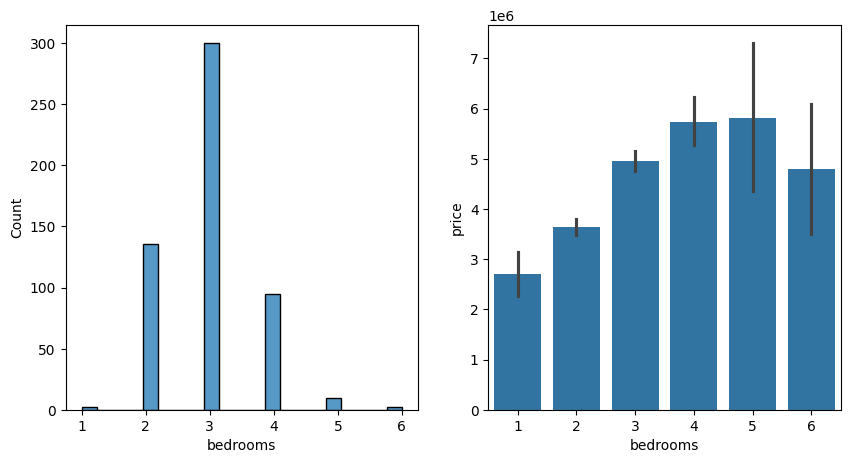

In [564]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.histplot(cleaned_data['bedrooms'],ax=axes[0])
sns.barplot(x=cleaned_data['bedrooms'], y=cleaned_data['price'], ax = axes[1])
plt.show()


由图一得，该数据集大多数房子的卧室数为3间。由图二得当卧室数为5以下时，房价随着卧室数的增加而增加，之后有下降的趋势

### 浴室与房价

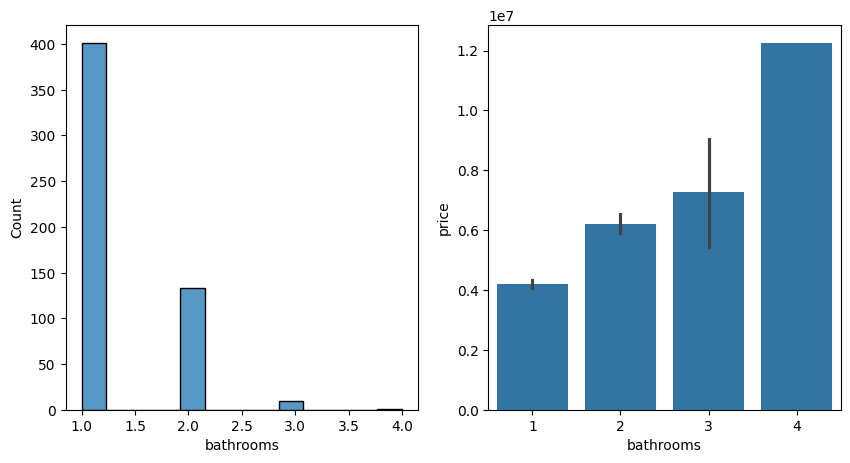

In [565]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.histplot(cleaned_data['bathrooms'],ax=axes[0])
sns.barplot(x=cleaned_data['bathrooms'], y=cleaned_data['price'], ax = axes[1])
plt.show()

由图一得大多数的房子都只有一间浴室，少数有两间，极少有三间及以上。由图二可得随着浴室数的增加房价也会增加

### 楼层数与房价

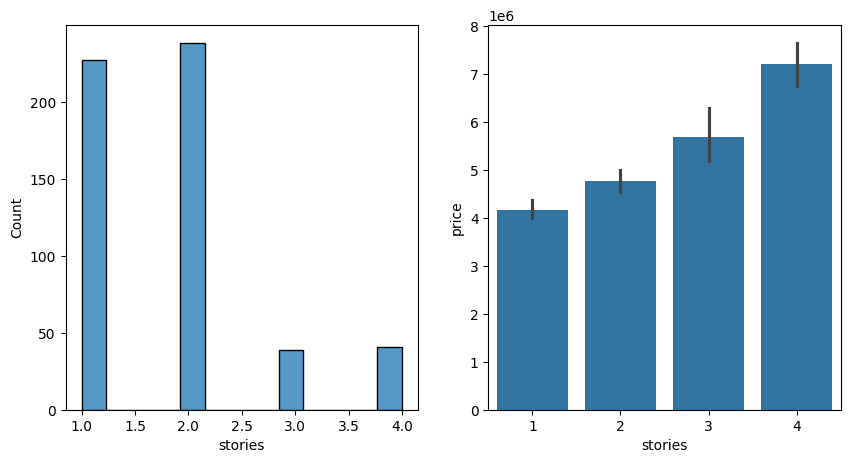

In [566]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.histplot(cleaned_data['stories'],ax=axes[0])
sns.barplot(x=cleaned_data['stories'], y=cleaned_data['price'], ax = axes[1])
plt.show()

由图一得大多数房子的楼层集中在一层和二层，少数的集中在三层和四层。由图二得随着楼层数的增加，房价也会增加

### 道路与房价

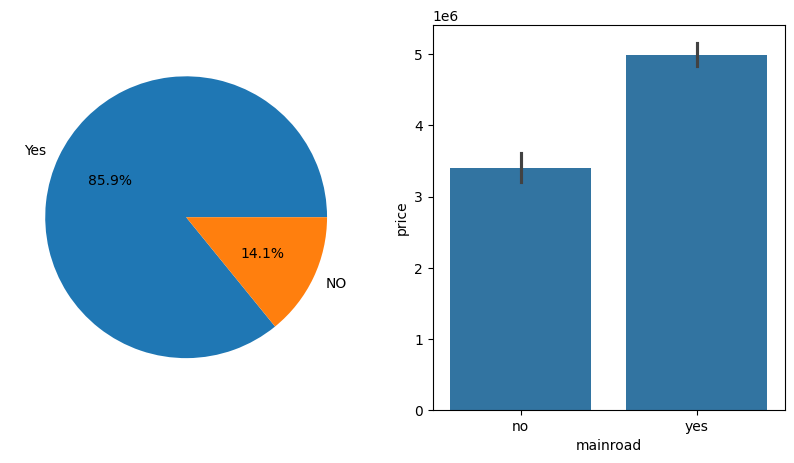

In [567]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].pie(cleaned_data['mainroad'].value_counts(),labels=['Yes','NO'], autopct='%.1f%%')
sns.barplot(x=cleaned_data['mainroad'], y=cleaned_data['price'],ax = axes[1])
plt.show()

该数据集大多数为在主要道路旁的房子并且，显然在主要道路旁的房子的房价比不在主要道路旁的多

### 客房与房价

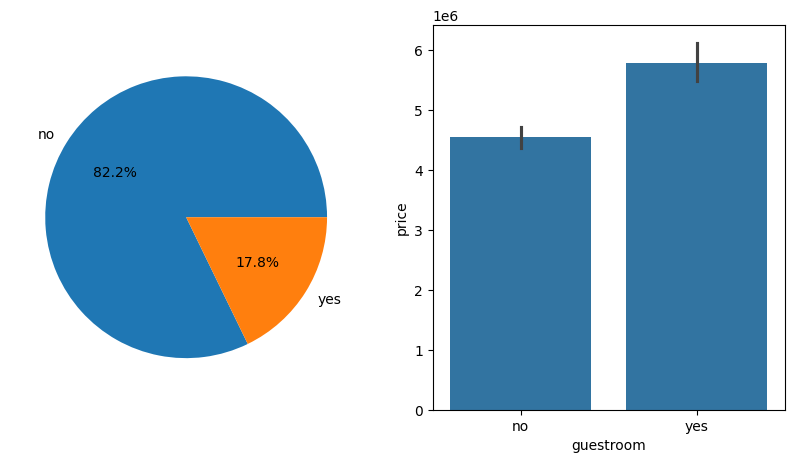

In [568]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].pie(cleaned_data['guestroom'].value_counts(),labels=cleaned_data['guestroom'].value_counts().index, autopct='%.1f%%')
sns.barplot(x=cleaned_data['guestroom'], y=cleaned_data['price'], ax=axes[1])
plt.show()

大多数房子都没有客房，有客房的房子的房价大于没有客房的房子的房价

### 地下室与房价

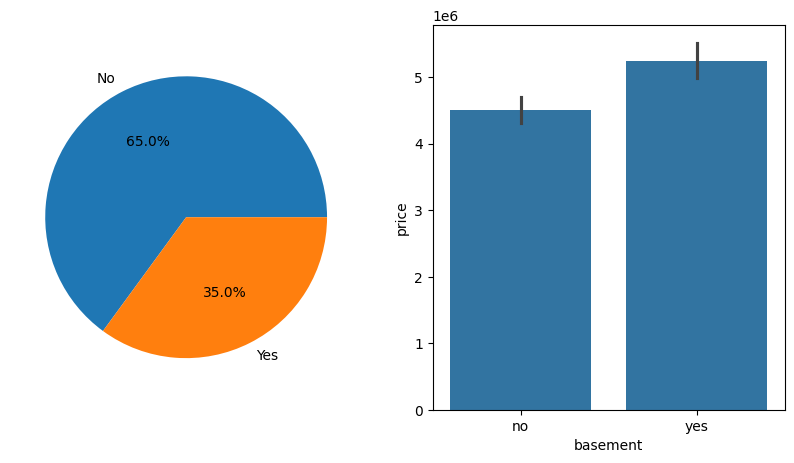

In [569]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].pie(cleaned_data['basement'].value_counts(),labels=['No','Yes'], autopct='%.1f%%')
sns.barplot(x=cleaned_data['basement'], y=cleaned_data['price'],ax=axes[1])
plt.show()

有图一得大多数房子都没有地下室，而且有地下室的房子的房价比没有的只是略微提高

### 热水供暖与房价

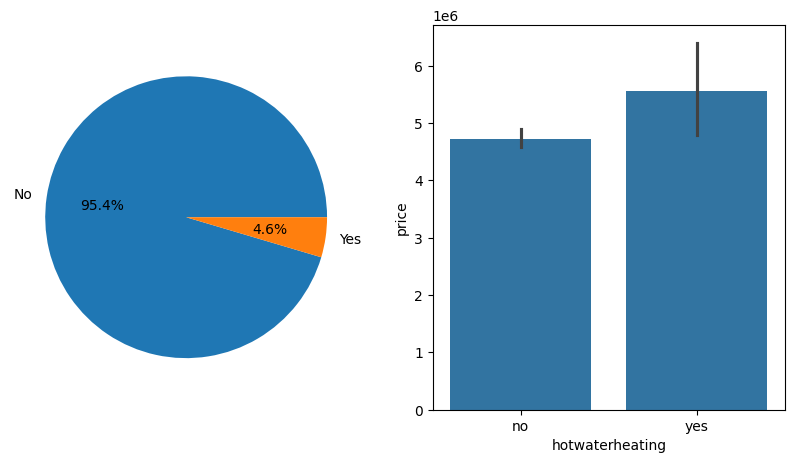

In [570]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].pie(cleaned_data['hotwaterheating'].value_counts(),labels=['No','Yes'], autopct='%.1f%%')
sns.barplot(x=cleaned_data['hotwaterheating'], y=cleaned_data['price'],ax=axes[1])
plt.show()

与地下室的情况类似，大多数房子都没有热水供暖，而且有热水供暖的房子的房价比没有的只是略微提高

### 空调与房价

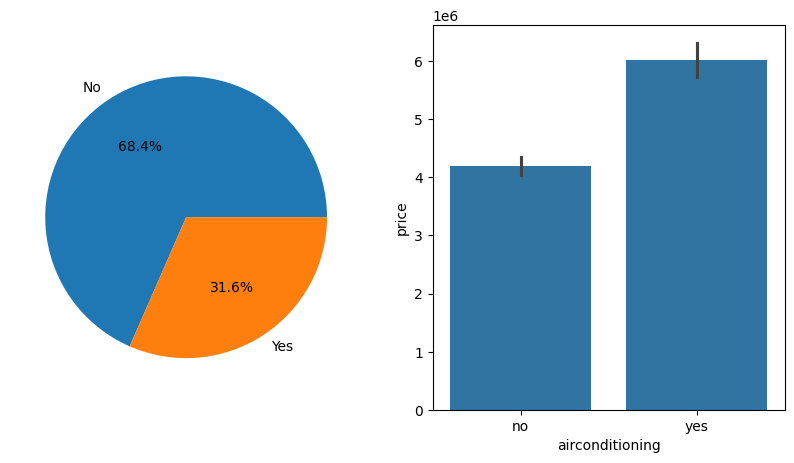

In [571]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].pie(cleaned_data['airconditioning'].value_counts(),labels=['No','Yes'], autopct='%.1f%%')
sns.barplot(x=cleaned_data['airconditioning'], y=cleaned_data['price'],ax=axes[1])
plt.show()

没有空调的房子的数量比有空调的房子的数量稍多，从图二可知有无空调对房价的影响较大

### 停车场与房价

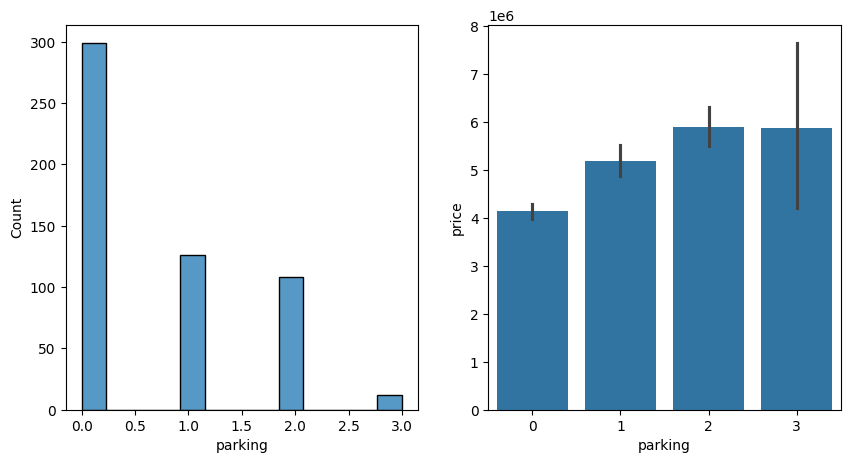

In [572]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.histplot(cleaned_data['parking'],ax=axes[0])
sns.barplot(x=cleaned_data['parking'], y=cleaned_data['price'], ax = axes[1])
plt.show()

大多数房子没有停车场，少数有一到两个停车场，极少数的房子有三个。且随着停车场的数量的增加，房价也随着增加，不过趋势再减小，两个停车场与三个停车场的房价几乎一样

### 首选位置与房价

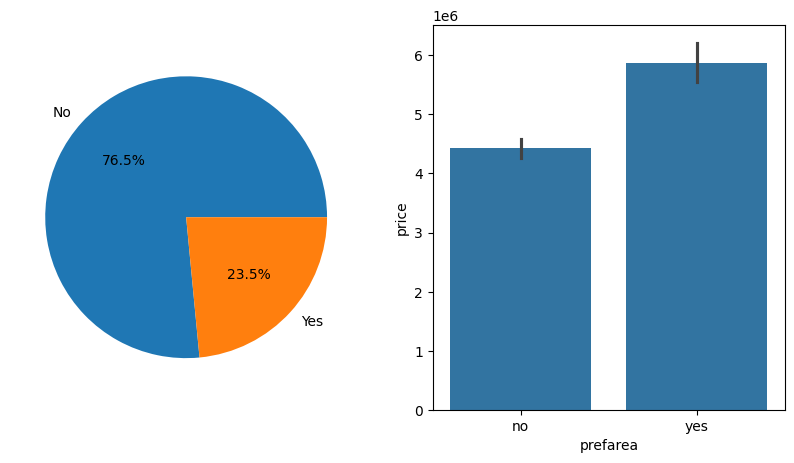

In [573]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].pie(cleaned_data['prefarea'].value_counts(),labels=['No','Yes'], autopct='%.1f%%')
sns.barplot(x=cleaned_data['prefarea'], y=cleaned_data['price'],ax=axes[1])
plt.show()

多数房子没有在首要位置，在首要位置的房子比不在首要位置的房子的房价要高

### 装修与房价

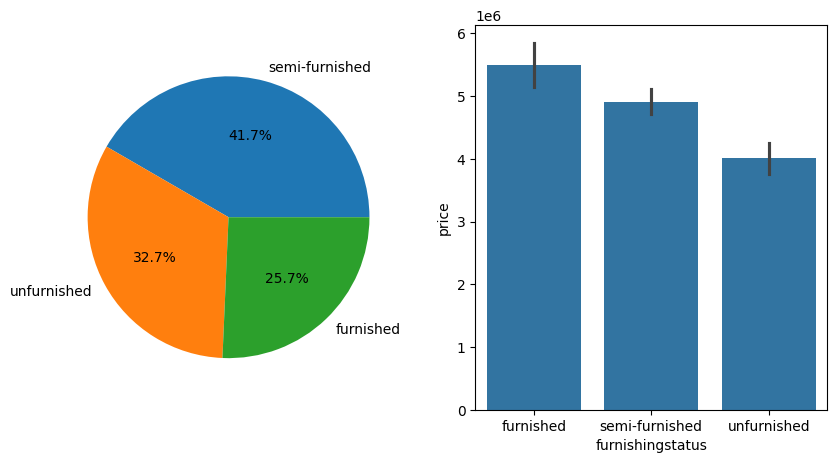

In [574]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].pie(cleaned_data['furnishingstatus'].value_counts(),labels=cleaned_data['furnishingstatus'].value_counts().index, autopct='%.1f%%')
sns.barplot(x=cleaned_data["furnishingstatus"], y=cleaned_data['price'], ax=axes[1])
plt.show()

半装修的房子最多，其次是毛坯房，最后是精装房。显然从房价来看，精装最多，半装修次之，毛坯最少。

## 分析数据

在这个部分我们将通过线性回归模型，建立房价与其他因素之间的关系模型，并且对房价进行预测

创建一个新的DataFrame`lr_house_price`，来作为我们线性回归分析所用的数据

In [575]:
lr_house_price = cleaned_data.copy()
lr_house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


创建虚拟变量

In [576]:
lr_house_price = pd.get_dummies(lr_house_price, columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],dtype=int, drop_first=True)
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


划分自变量与因变量

自变量为`price`，因变量为除了`price `之外的所有变量

In [577]:
y = lr_house_price['price']
x = lr_house_price.drop('price',axis=1)
print(y)
x

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,0,0


在自变量中增加常数

In [578]:
x = sm.add_constant(x)
x

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


检查自变量之间的相关性

In [579]:
x.corr().abs()>0.8

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
const,False,False,False,False,False,False,False,False,False,False,False,False,False,False
area,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,False,True,False,False,False,False


各自变量之间没有强相关性

进行线性回归

In [580]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Thu, 16 May 2024   Prob (F-statistic):          9.07e-123
Time:                        17:20:24   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

我们把显著区间定为0.05，通过观察各自变量的p值发现：`const`，`bedrooms`，`furnishingstatus_semi-furnished`的p值大于0.05，说明这三个变量对`price`没有显著影响，需要将其删去然后重行进行，线性回归

删除x中的`const`，`bedrooms`，`furnishingstatus_semi-furnished`

In [581]:
x = x.drop(['const','bedrooms','furnishingstatus_semi-furnished'], axis=1)
x

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,7420,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,3,1,0,0,0,1,0,0
2,9960,2,2,2,1,0,1,0,0,1,0
3,7500,2,2,3,1,0,1,0,1,1,0
4,7420,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,1,1,2,1,0,1,0,0,0,1
541,2400,1,1,0,0,0,0,0,0,0,0
542,3620,1,1,0,1,0,0,0,0,0,1
543,2910,1,1,0,0,0,0,0,0,0,0


In [582]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Thu, 16 May 2024   Prob (F-statistic):                        0.00
Time:                        17:20:24   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`R-squared (uncentered)`:	0.957 说明该模型的拟合度已经很高了，再检查一下p值没有大于0.05的自变量。模型的构建就完成了

通过模型对房价进行预测

假设一间房子的`area` :5683, `bedrooms`:5, `bathrooms`:2, `stories`:3, `mainroad`:yes, `guestroom`:yes, `basement`:no, `hotwaterheating`:no, `airconditioning`:yes, `parking`:1, `prefarea`:yes, `furnishingstatus`:semi-furnished

对此房子进行房价的预测

In [583]:
predict_data = pd.DataFrame({'area':5683,
                             'bedrooms':5,
                             'bathrooms':2,
                             'stories':3,
                             'mainroad':'yes',
                             'guestroom':'yes',
                             'basement':'no',
                             'hotwaterheating':'no',
                             'airconditioning':'yes',
                             'parking':1,
                             'prefarea':'yes',
                             "furnishingstatus":'semi-furnished'},index = ['1'])
predict_data['mainroad'] = pd.Categorical(predict_data['mainroad'], categories=['no','yes'])
predict_data['guestroom'] = pd.Categorical(predict_data['guestroom'], categories=['no','yes'])
predict_data['basement'] = pd.Categorical(predict_data['basement'], categories=['no','yes'])
predict_data['hotwaterheating'] = pd.Categorical(predict_data['hotwaterheating'], categories=['no','yes'])
predict_data['airconditioning'] = pd.Categorical(predict_data['airconditioning'], categories=['no','yes'])
predict_data['prefarea'] = pd.Categorical(predict_data['prefarea'], categories=['no','yes'])
predict_data['furnishingstatus'] = pd.Categorical(predict_data['furnishingstatus'], categories=['furnished','semi-furnished','unfurnished'])

创建虚拟变量

In [584]:
predict_data = pd.get_dummies(predict_data, columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],
                              dtype=int,drop_first=True)
predict_data = predict_data.drop(['bedrooms','furnishingstatus_semi-furnished'], axis=1)
predict_data


,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
1,5683,2,3,1,1,1,0,0,1,1,0


In [587]:
result = model.predict(predict_data)
result

1    7.660626e+06
dtype: float64

预测结果为7660626元